In [1]:
import pandas as pd

In [12]:
data = (
    pd.read_csv('../large_files/spam.csv', encoding='latin-1')
    .drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
    .rename(columns={'v1': 'label', 'v2': 'text'})
)

In [14]:
data.shape

(5572, 2)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer()

In [20]:
X = tfidf.fit_transform(data.text)

In [22]:
X.shape

(5572, 8672)

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
from sklearn.preprocessing import LabelEncoder

In [39]:
from sklearn.metrics import classification_report

In [40]:
from sklearn.model_selection import train_test_split

In [33]:
encoder = LabelEncoder()

In [34]:
y = encoder.fit_transform(data.label)

In [35]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
model = AdaBoostClassifier()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [42]:
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [43]:
model.score(X_train, y_train)

0.9851885098743267

In [44]:
model.score(X_test, y_test)

0.96561004784689

In [45]:
y_hat = model.predict(X)

In [46]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4825
           1       0.95      0.85      0.90       747

    accuracy                           0.97      5572
   macro avg       0.96      0.92      0.94      5572
weighted avg       0.97      0.97      0.97      5572



In [47]:
from wordcloud import WordCloud

In [48]:
print(WordCloud.__doc__)

Word cloud object for generating and drawing.

    Parameters
    ----------
    font_path : string
        Font path to the font that will be used (OTF or TTF).
        Defaults to DroidSansMono path on a Linux machine. If you are on
        another OS or don't have this font, you need to adjust this path.

    width : int (default=400)
        Width of the canvas.

    height : int (default=200)
        Height of the canvas.

    prefer_horizontal : float (default=0.90)
        The ratio of times to try horizontal fitting as opposed to vertical.
        If prefer_horizontal < 1, the algorithm will try rotating the word
        if it doesn't fit. (There is currently no built-in way to get only
        vertical words.)

    mask : nd-array or None (default=None)
        If not None, gives a binary mask on where to draw words. If mask is not
        None, width and height will be ignored and the shape of mask will be
        used instead. All white (#FF or #FFFFFF) entries will be consi

In [49]:
wc = WordCloud()

In [50]:
wc.generate??

In [51]:
def generate_wc_img(target_label):
    texts = data[data.label == target_label].text
    all_content = ''
    for text in texts:
        all_content += text.lower()
    wc_img = wc.generate(all_content)
    return wc_img

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
spam_img = generate_wc_img('spam')
ham_img = generate_wc_img('ham')

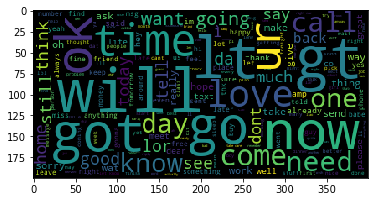

In [69]:
plt.imshow(spam_img)

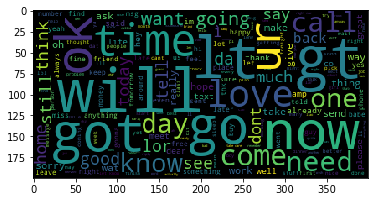

In [68]:
plt.imshow(ham_img)